In [24]:
# Import the library
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

from xgboost import XGBRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
# Read Data
train_file_path = "house_prices_train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

df_train=pd.read_csv("house_prices_train.csv")
df_test=pd.read_csv("house_prices_test.csv")

print("Train shape:",df_train.shape)
print("Test Shape:",df_test.shape)

# Separate features and target
X_trainfull=df_train.drop(["SalePrice"], axis=1)
y=df_train.SalePrice

Full train dataset shape is (1460, 81)
Train shape: (1460, 81)
Test Shape: (1459, 80)


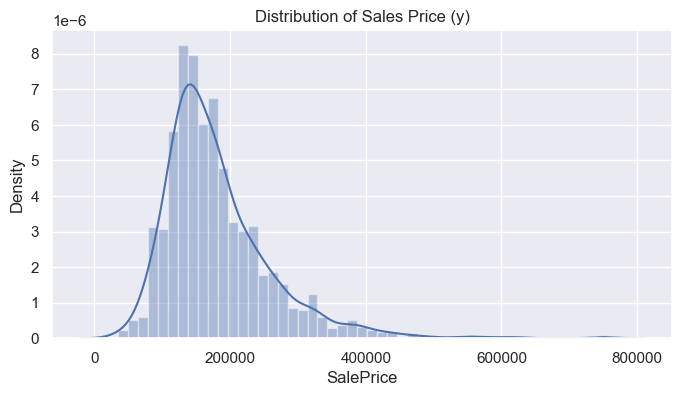

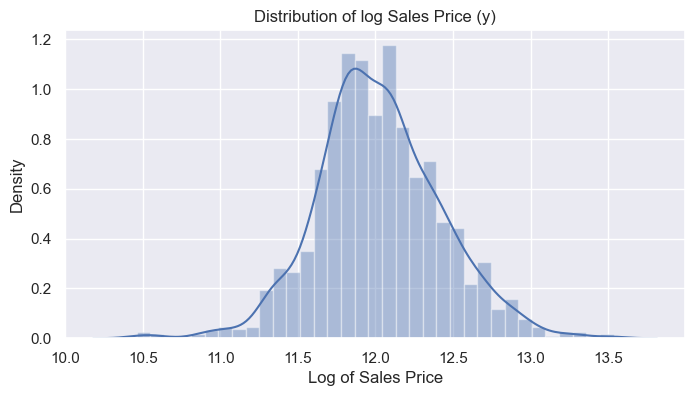

In [26]:
# Distribution of Saleprice
plt.figure(figsize=(8,4))
plt.title("Distribution of Sales Price (y)")
sns.distplot(y)
plt.show()

# it can be observed from above that y is right-skewed, log transform can be applied to make it normal distribution.

y=np.log1p(y)

plt.figure(figsize=(8,4))
plt.title("Distribution of log Sales Price (y)")
sns.distplot(y)
plt.xlabel("Log of Sales Price")
plt.show()

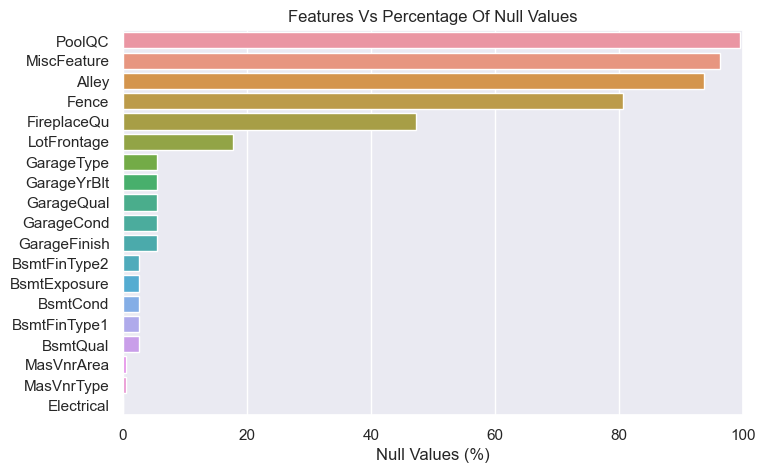

In [27]:
# Percentage of null valued features in Train data
d_temp=X_trainfull.isna().sum().sort_values(ascending=False)
d_temp=d_temp[d_temp>0]
d_temp=d_temp/df_train.shape[0]*100

plt.figure(figsize=(8,5))
plt.title("Features Vs Percentage Of Null Values")
sns.barplot(y=d_temp.index,x=d_temp, orient='h')
plt.xlim(0,100)
plt.xlabel("Null Values (%)")
plt.show()

# Drop features where more than 20% records are null
na_index=(d_temp[d_temp>20]).index
X_trainfull.drop(na_index, axis=1, inplace=True)

In [28]:
# Split Categorical and Numeric Features
num_cols=X_trainfull.corrwith(y).abs().sort_values(ascending=False).index
X_num=X_trainfull[num_cols]
X_cat=X_trainfull.drop(num_cols,axis=1)

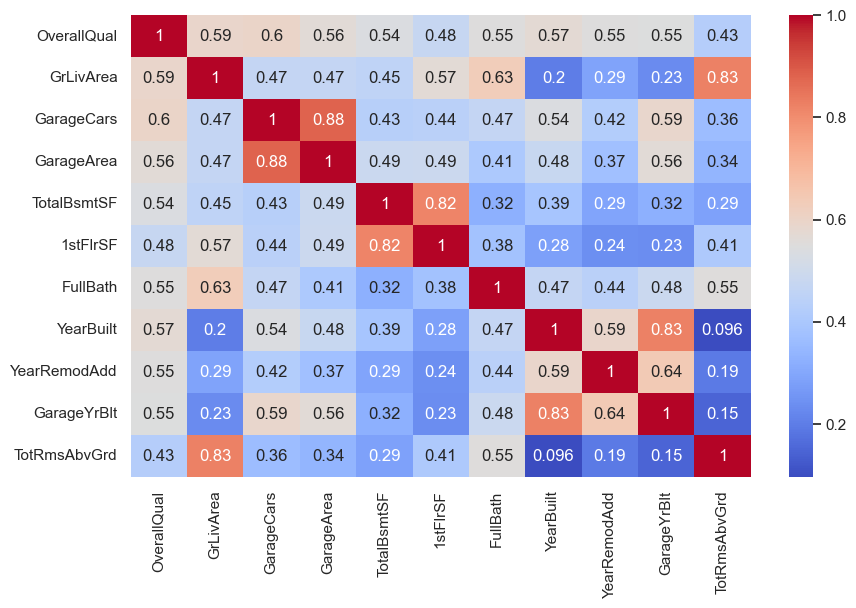

Correlation of Each feature with target:
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
dtype: float64


In [29]:
# NUMERICAL FEATURES: FEATURE SELECTION AND ENGINEERING
# View sample data
X_num.sample(5)

# Identify Features Highly correlated with target
high_corr_num=X_num.corrwith(y)[X_num.corrwith(y).abs()>0.5].index
X_num=X_num[high_corr_num]

# Heat-map of highly correlated Features
plt.figure(figsize=(10,6))
sns.heatmap(X_num.corr(), annot=True, cmap='coolwarm')
plt.show()

print("Correlation of Each feature with target:")
print(X_num.corrwith(y))


In [30]:
# Handling Null values
null_count = X_num.isnull().sum()
print(null_count)

#function to handle NA
def handle_na(df, func):
    """
    Input dataframe and function 
    Returns dataframe after filling NA values
    eg: df=handle_na(df, 'mean')
    """
    na_cols=df.columns[df.isna().sum()>0]
    for col in na_cols:
        if func=='mean':
            df[col]=df[col].fillna(df[col].mean())
        if func=='mode':
            df[col]=df[col].fillna(df[col].mode()[0])
    return df

X_num=handle_na(X_num, 'mean')

OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
TotRmsAbvGrd     0
dtype: int64


In [31]:
# Scale values
# Function to scale df 
def scale_df(df):
    """
    Input: data frame
    Output: Returns minmax scaled Dataframe 
    eg: df=scale_df(df)
    """
    scaler=MinMaxScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(np.array(df[col]).reshape(-1,1))
    return df

X_num=scale_df(X_num)

In [32]:
# Model Testing : Only Numerical Features
X_train, X_val, y_train, y_val=train_test_split(X_num,y, test_size=0.2)
model=LinearRegression()
model.fit(X_train,y_train)
print(f"Liner Regression Train score : {model.score(X_train,y_train)}")
print(f"Liner Regression Validation score : {model.score(X_val,y_val)}\n")

model=SVR()
model.fit(X_train,y_train)
print(f"SVR Train score : {model.score(X_train,y_train)}")
print(f"SVR Validation score : {model.score(X_val,y_val)}\n")

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
print(f"Random Forest Train score : {model.score(X_train,y_train)}")
print(f"Random Forest Validation score : {model.score(X_val,y_val)}\n")

model=XGBRegressor(learning_rate=0.1)
model.fit(X_train,y_train)
print(f"XGB Regressor Train score : {model.score(X_train,y_train)}")
print(f"XGB Regressor Validation score : {model.score(X_val,y_val)}\n")

Liner Regression Train score : 0.8137960233521798
Liner Regression Validation score : 0.8562161149385694

SVR Train score : 0.8774114154482691
SVR Validation score : 0.8685441475478238

Random Forest Train score : 0.9757350157327571
Random Forest Validation score : 0.8469496428718581

XGB Regressor Train score : 0.9816439553083808
XGB Regressor Validation score : 0.837048475600775



In [33]:
#List the Numerical features required
num_features=X_num.columns
print(num_features)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
       'TotRmsAbvGrd'],
      dtype='object')


In [34]:
# CATEGORICAL DATA FEATURE SELECTION AND ENGINEERING
# Explore Data
# View sample data
print(X_cat.sample(5))

# Describe categorical columns
print(X_cat.describe())
print()

for feature in X_cat.columns:
    print(
        f"{feature} :{len(X_cat[feature].unique())}: {X_cat[feature].unique()}"
    )
    
# Drop features with more than 30 null values
cat_na=X_cat.isna().sum().sort_values(ascending=False)
cat_na=cat_na[cat_na>30]
X_cat.drop(cat_na.index, axis=1, inplace=True)


     MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
1294       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
379        RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
317        FV   Pave      Reg         Lvl    AllPub    Inside       Gtl   
936        RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
1294      Edwards       Norm       Norm  ...      SBrkr          TA   
8         OldTown     Artery       Norm  ...      FuseF          TA   
379       Gilbert       RRAn       Norm  ...      SBrkr          TA   
317       Somerst       Norm       Norm  ...      SBrkr          Gd   
936       SawyerW       Norm       Norm  ...      SBrkr          Gd   

     Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
1294        Typ     Detchd          Unf       

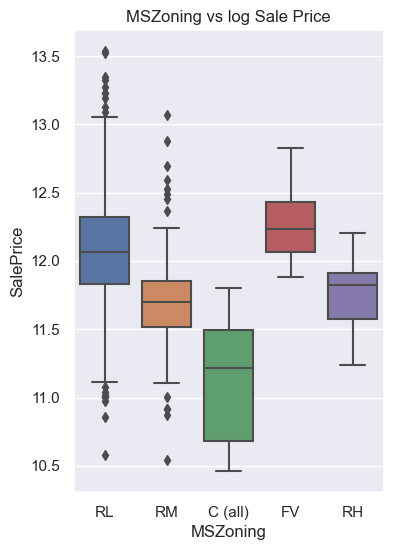

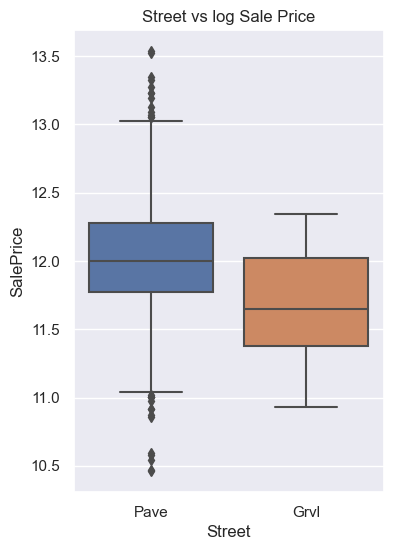

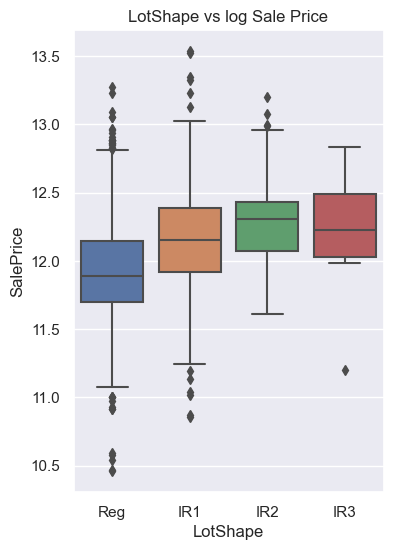

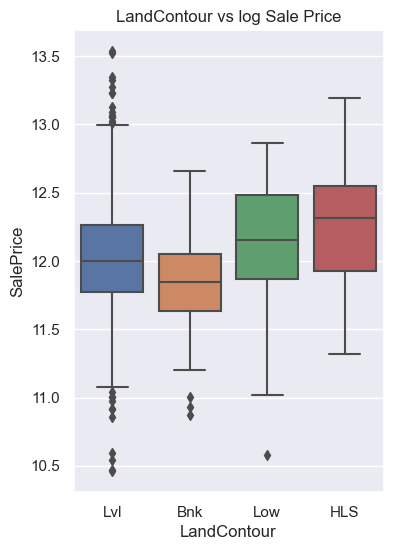

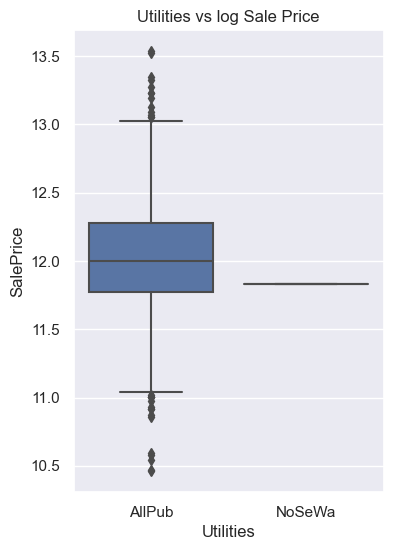

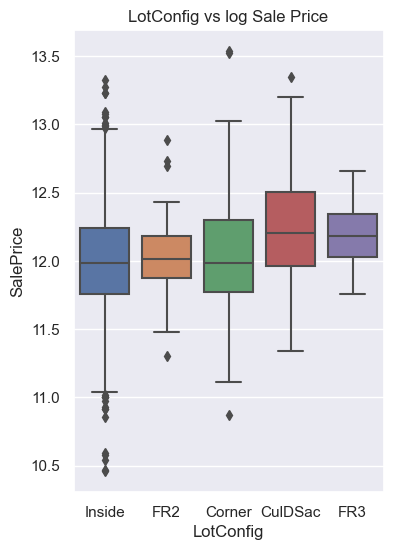

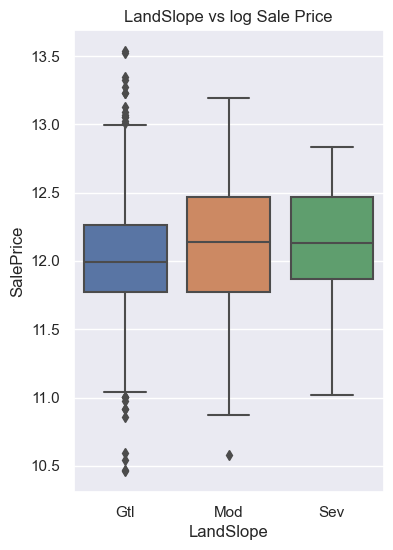

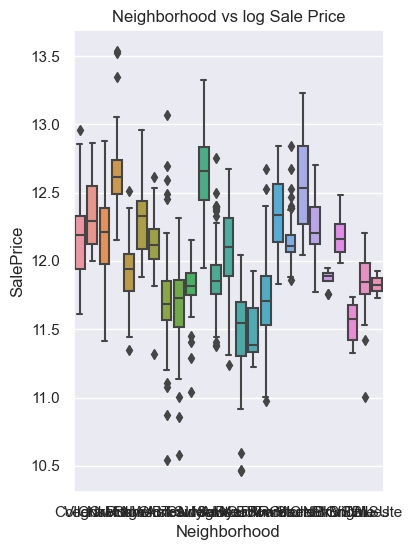

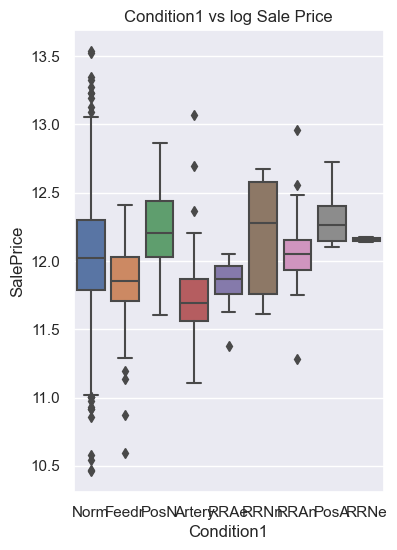

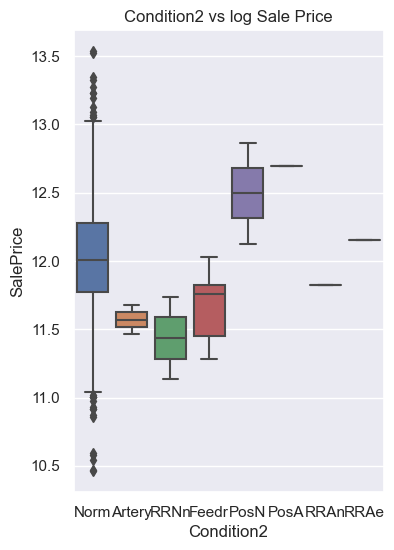

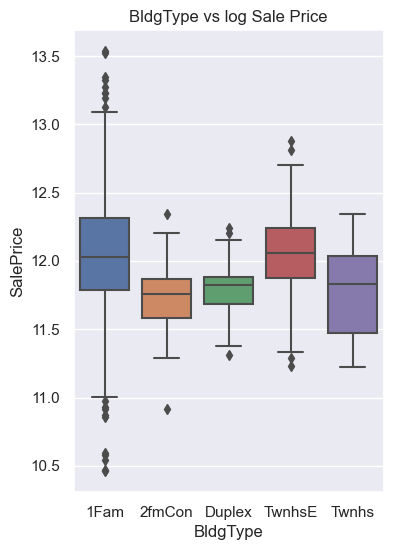

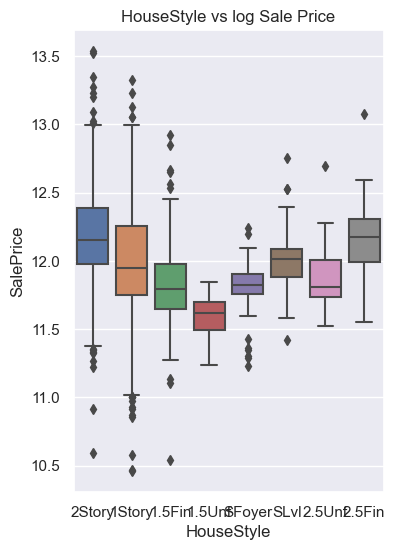

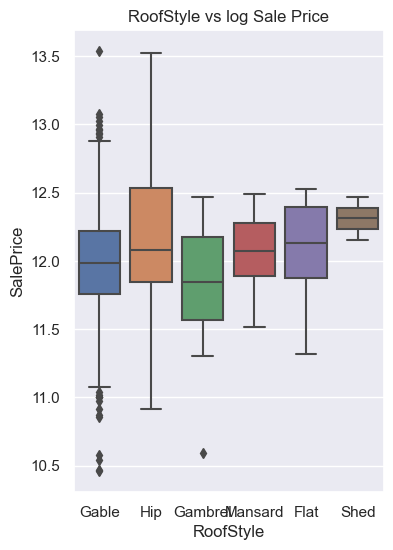

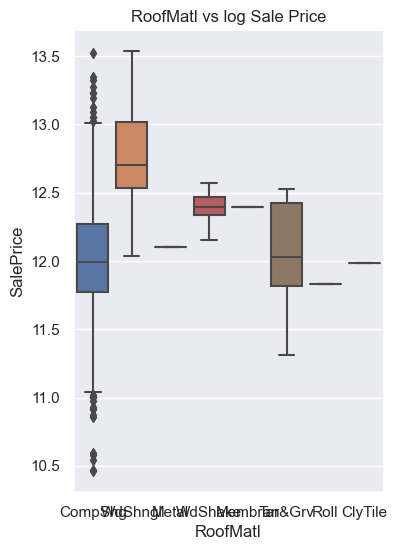

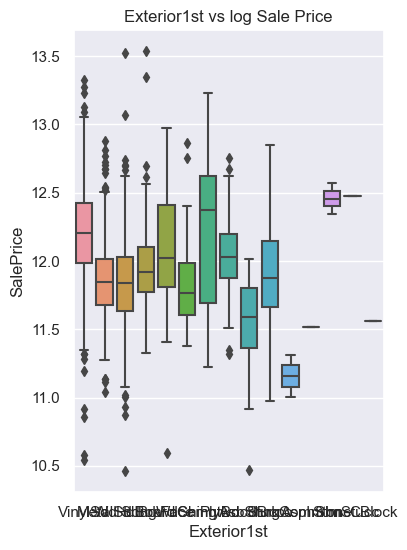

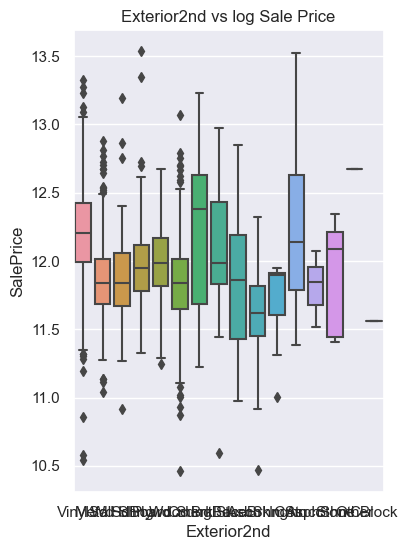

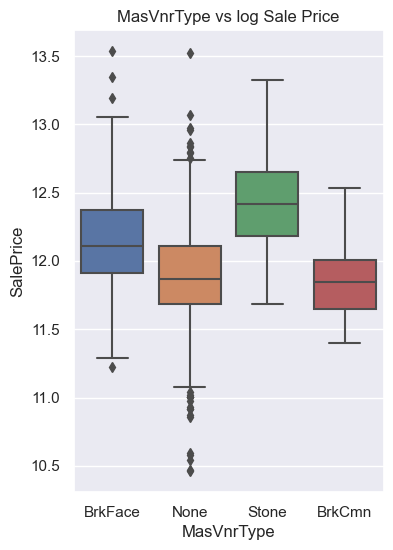

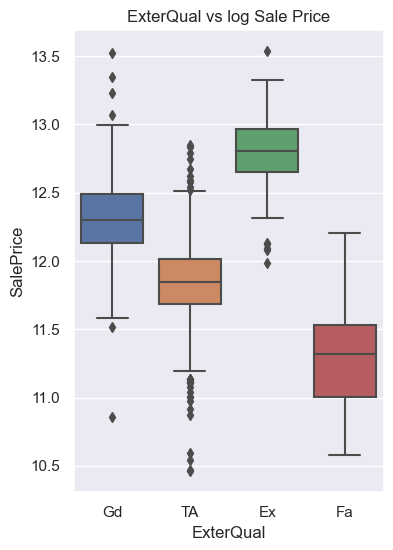

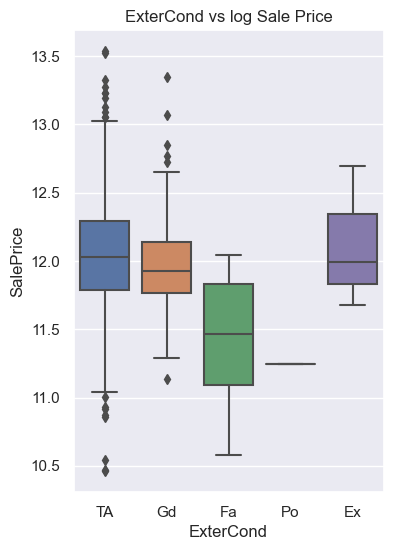

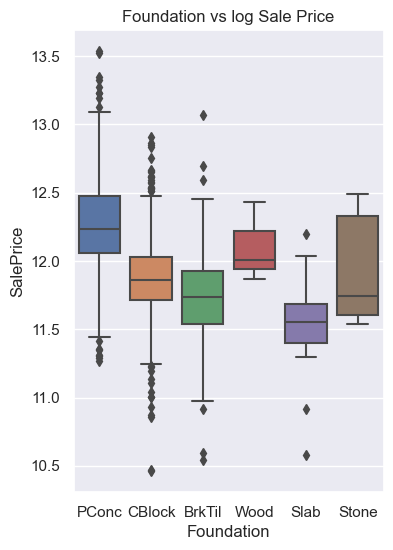

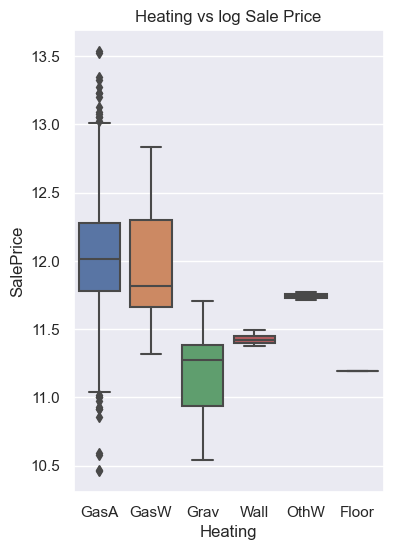

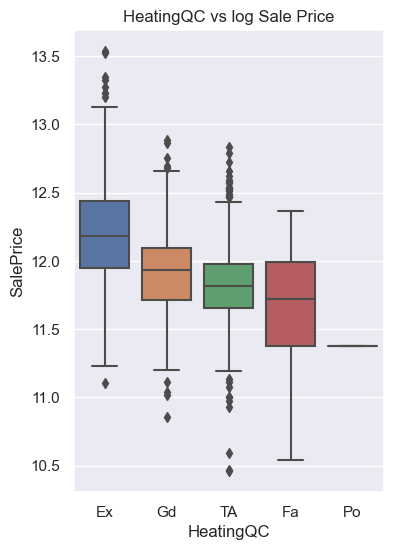

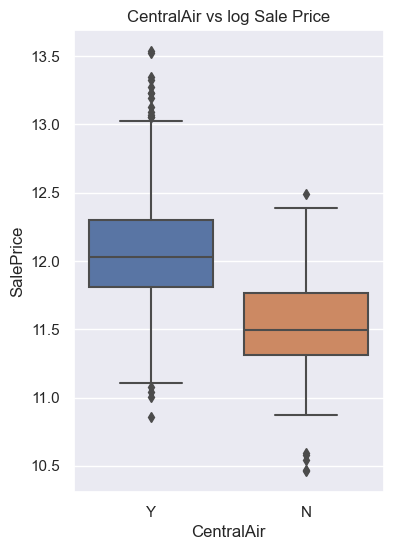

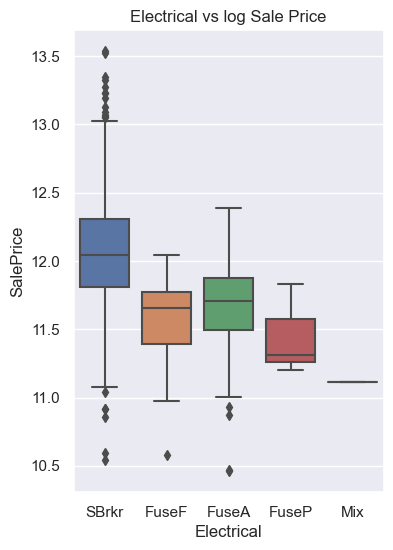

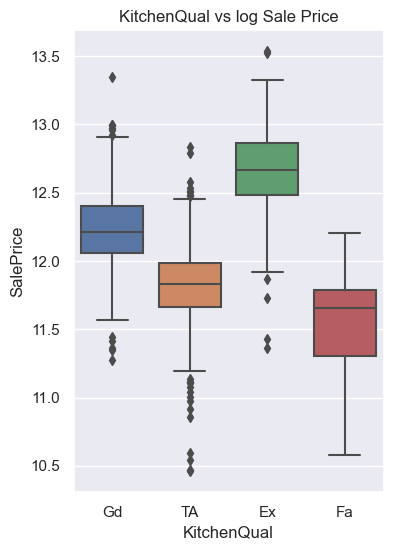

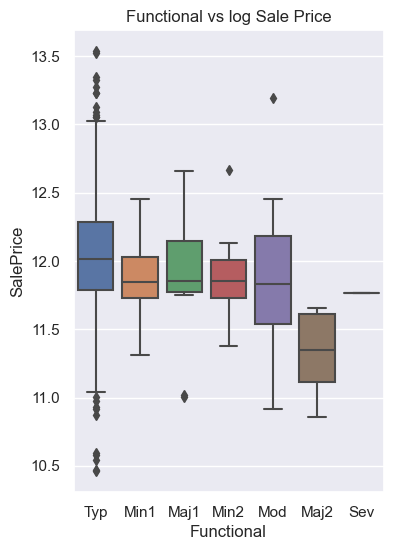

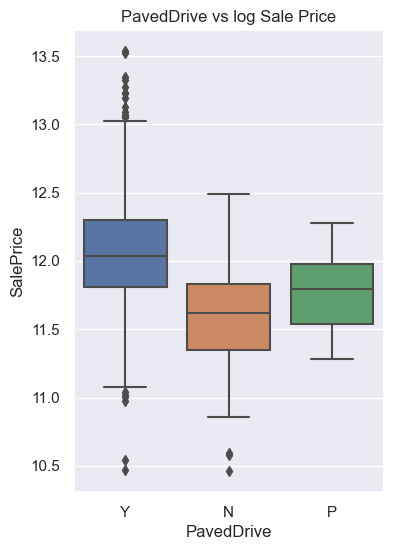

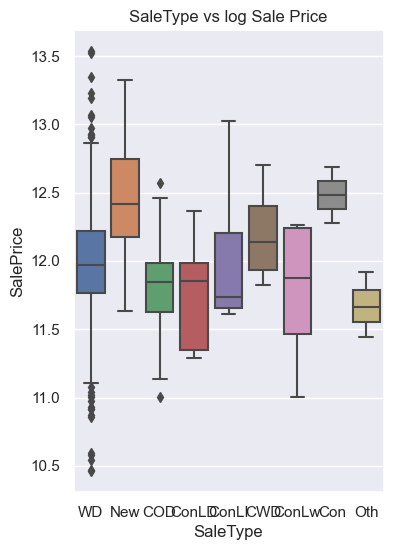

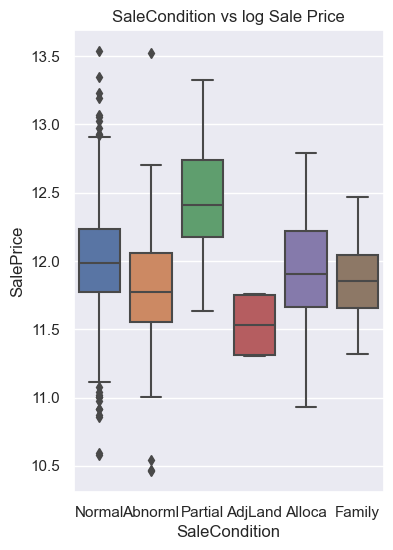

In [35]:
# EDA: Relation between each feature and saleprice
for feature in X_cat.columns:
    plt.figure(figsize=(4,6))
    plt.title(f"{str(feature)} vs log Sale Price")
    sns.boxplot(x=X_cat[feature], y=y)
    plt.show()

In [36]:
# Handling Null Values
X_cat=handle_na(X_cat, 'mode')

In [37]:
# Label encode features
le=LabelEncoder()
X_cat_le=pd.DataFrame()
for col in X_cat.columns:
    X_cat_le[col] = le.fit_transform(X_cat[col])

In [38]:
# Split into Train and validation set
Xc_train, Xc_test, yc_train,yc_test=train_test_split(X_cat_le,y, test_size=0.2)

In [39]:
# Fit and Evaluate Random Forest Model
model=RandomForestRegressor()
model.fit(Xc_train,yc_train)

print(f"Train score : {model.score(Xc_train,yc_train)}")
print(f"Test score : {model.score(Xc_test,yc_test)}")

Train score : 0.951965957580248
Test score : 0.6855760327190354


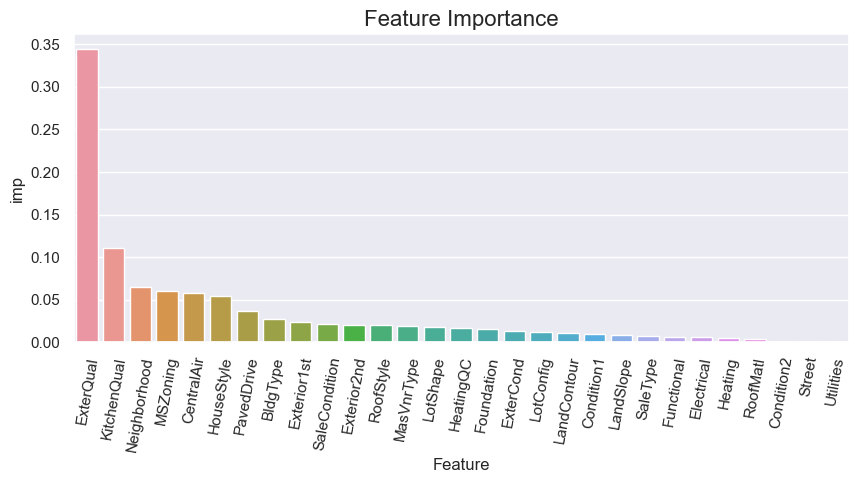

In [40]:
# Feature importance from RF Model
feat_imp=pd.DataFrame({"Feature":Xc_train.columns,"imp":model.feature_importances_})
feat_imp=feat_imp.sort_values('imp', ascending=False)

plt.figure(figsize=(10,4))
plt.title("Feature Importance", fontsize=16)
sns.barplot(x='Feature', y='imp', data=feat_imp)
plt.xticks(rotation=80)
plt.show()

In [41]:
# Calculate Training and Validation Accuracy for different number of features
feat=[]
score_train=[]
score_test=[]
for i in range(29):
    imp_ft=feat_imp.head(i+1).Feature.unique()

    X_cat_imp=pd.DataFrame()
    for col in imp_ft:
        X_cat_imp[col] = le.fit_transform(X_cat[col])

    Xc_train, Xc_test, yc_train,yc_test=train_test_split(X_cat_imp,y, test_size=0.2)

    model=RandomForestRegressor(n_estimators=100)
    model.fit(Xc_train,yc_train)
    feat.append(i+1)
    score_train.append(model.score(Xc_train,yc_train))
    score_test.append(model.score(Xc_test,yc_test))
    
acc_feat_df=pd.DataFrame({"Feature":feat,"TrainAcc":score_train,"ValAcc":score_test})

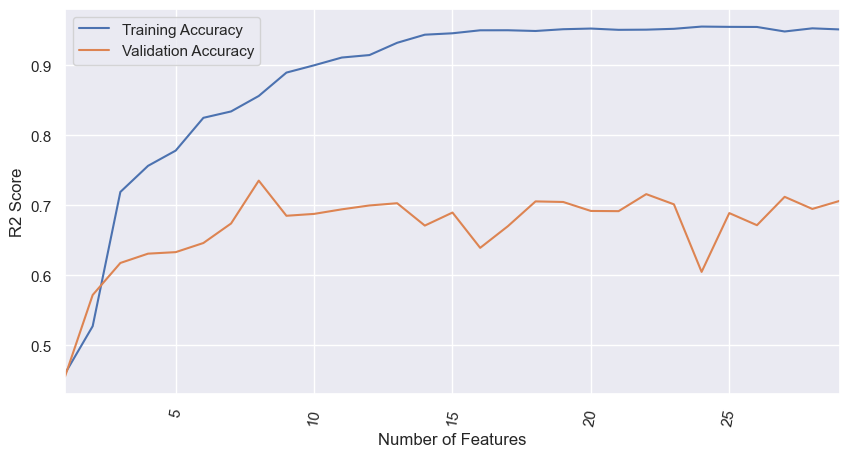

In [42]:
# Plot Number of Features vs Model Performance
plt.figure(figsize=(10,5))
sns.lineplot(x='Feature', y='TrainAcc', data=acc_feat_df, label="Training Accuracy")
sns.lineplot(x='Feature', y='ValAcc', data=acc_feat_df, label="Validation Accuracy")
plt.xlabel("Number of Features")
plt.ylabel("R2 Score")
plt.xticks(rotation=80)
plt.xlim(1,29)
plt.show()

In [43]:
# List of selected Categorical Features
cat_features=list(feat_imp.iloc[:17,0])

# Model Testing Only catagorical Features
# Selecting only important features
X_cat=X_cat[cat_features]
# OHE features
X_cat=pd.get_dummies(X_cat)
# Scaling the data
X_cat=scale_df(X_cat)

X_train, X_val, y_train, y_val=train_test_split(X_cat,y, test_size=0.2)

model=LinearRegression()
model.fit(X_train,y_train)
print(f"Linear Regression Train score : {model.score(X_train,y_train)}")
print(f"Linear Regression Validation score : {model.score(X_val,y_val)}\n")

model=SVR()
model.fit(X_train,y_train)
print(f"SVR Train score : {model.score(X_train,y_train)}")
print(f"SVR Validation score : {model.score(X_val,y_val)}\n")

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
print(f"Random Forest Train score : {model.score(X_train,y_train)}")
print(f"Random Forest Validation score : {model.score(X_val,y_val)}\n")

model=XGBRegressor(learning_rate=0.1)
model.fit(X_train,y_train)
print(f"XGB Regressor Train score : {model.score(X_train,y_train)}")
print(f"XGB Regressor Validation score : {model.score(X_val,y_val)}\n")


Linear Regression Train score : 0.7961142664224774
Linear Regression Validation score : -7.391682864602005e+23

SVR Train score : 0.9090396795924742
SVR Validation score : 0.7711095909875592

Random Forest Train score : 0.9525087237779749
Random Forest Validation score : 0.6865083687538387

XGB Regressor Train score : 0.9307607083455913
XGB Regressor Validation score : 0.7459327581607771



In [44]:
# FEATURE ENGINEERING IN COMBINED TRAIN AND TEST DATA
#Combine train and test data
Xtt=pd.concat([X_trainfull,df_test])

#Split into Numeric and categoric features
Xtt_num= Xtt[num_features]
Xtt_cat= Xtt[cat_features]

#Handling null values
Xtt_cat=handle_na(Xtt_cat, 'mode')
Xtt_num=handle_na(Xtt_num,'mean')

#OHE Categoric features
Xtt_cat=pd.get_dummies(Xtt_cat,drop_first=True)

#Combine Numeric and Categorical features
Xtt=pd.concat([Xtt_num,Xtt_cat], axis=1)

#Scale Features
Xtt=scale_df(Xtt)

#Training and Testing Features after Feature Engineering
X=Xtt.iloc[:df_train.shape[0],:]
X_test=Xtt.iloc[df_train.shape[0]:,:]

#Training and Validation features and target
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2)

In [46]:
# Training, Evaluation and Prediction
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)
print(f"Linear Regression Train score : {model_LR.score(X_train,y_train)}")
print(f"Linear Regression Validation score : {model_LR.score(X_val,y_val)}\n")
yv_LR=model_LR.predict(X_val)
yt_LR=model_LR.predict(X_test)

model_SV=SVR()
model_SV.fit(X_train,y_train)
print(f"SVR Train score : {model_SV.score(X_train,y_train)}")
print(f"SVR Validation score : {model_SV.score(X_val,y_val)}\n")
yv_SVR=model_SV.predict(X_val)
yt_SVR=model_SV.predict(X_test)

model_RF=RandomForestRegressor(n_estimators=100)
model_RF.fit(X_train,y_train)
print(f"Random Forest Train score : {model_RF.score(X_train,y_train)}")
print(f"Random Forest Validation score : {model_RF.score(X_val,y_val)}\n")
yv_RF=model_RF.predict(X_val)
yt_RF=model_RF.predict(X_test)

model_XGB=XGBRegressor(learning_rate=0.1)
model_XGB.fit(X_train,y_train)
print(f"XGB Regressor Train score : {model_XGB.score(X_train,y_train)}")
print(f"XGB Regressor Validation score : {model_XGB.score(X_val,y_val)}\n")
yv_XGB=model_XGB.predict(X_val)
yt_XGB=model_XGB.predict(X_test)

Linear Regression Train score : 0.9008029747569306
Linear Regression Validation score : -2.3153937845729807e+18

SVR Train score : 0.9477011141620353
SVR Validation score : 0.8060806826349427

Random Forest Train score : 0.9809541049458426
Random Forest Validation score : 0.7954087492844588

XGB Regressor Train score : 0.988549621183746
XGB Regressor Validation score : 0.79778848079716



In [117]:
# Model Stacking
yv_stacked=np.column_stack((yv_SVR,yv_RF,yv_XGB))
yt_stacked=np.column_stack((yt_SVR,yt_RF,yt_XGB))

meta_model=LinearRegression()
meta_model.fit(yv_stacked,y_val)
print(meta_model.score(yv_stacked,y_val))

y_final=np.expm1(meta_model.predict(yt_stacked))

0.8880146827305104
